In [1]:
import pandas as pd

# Parquetファイルのパス
file_path = '../04_Features/images.parquet'
df = pd.read_parquet(file_path)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14890 entries, 0 to 14889
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    14890 non-null  int64         
 1   dirname                  14890 non-null  object        
 2   path                     14890 non-null  object        
 3   width                    14890 non-null  int64         
 4   height                   14890 non-null  int64         
 5   created_time             14890 non-null  datetime64[us]
 6   modified_time            14890 non-null  datetime64[us]
 7   color_mode               14890 non-null  object        
 8   file_size                14890 non-null  float64       
 9   color_histogram          14890 non-null  object        
 10  color_histogram_pca      14890 non-null  object        
 11  color_histogram_std      14890 non-null  object        
 12  perceptual_hash          14890 n

Too dark images: 52


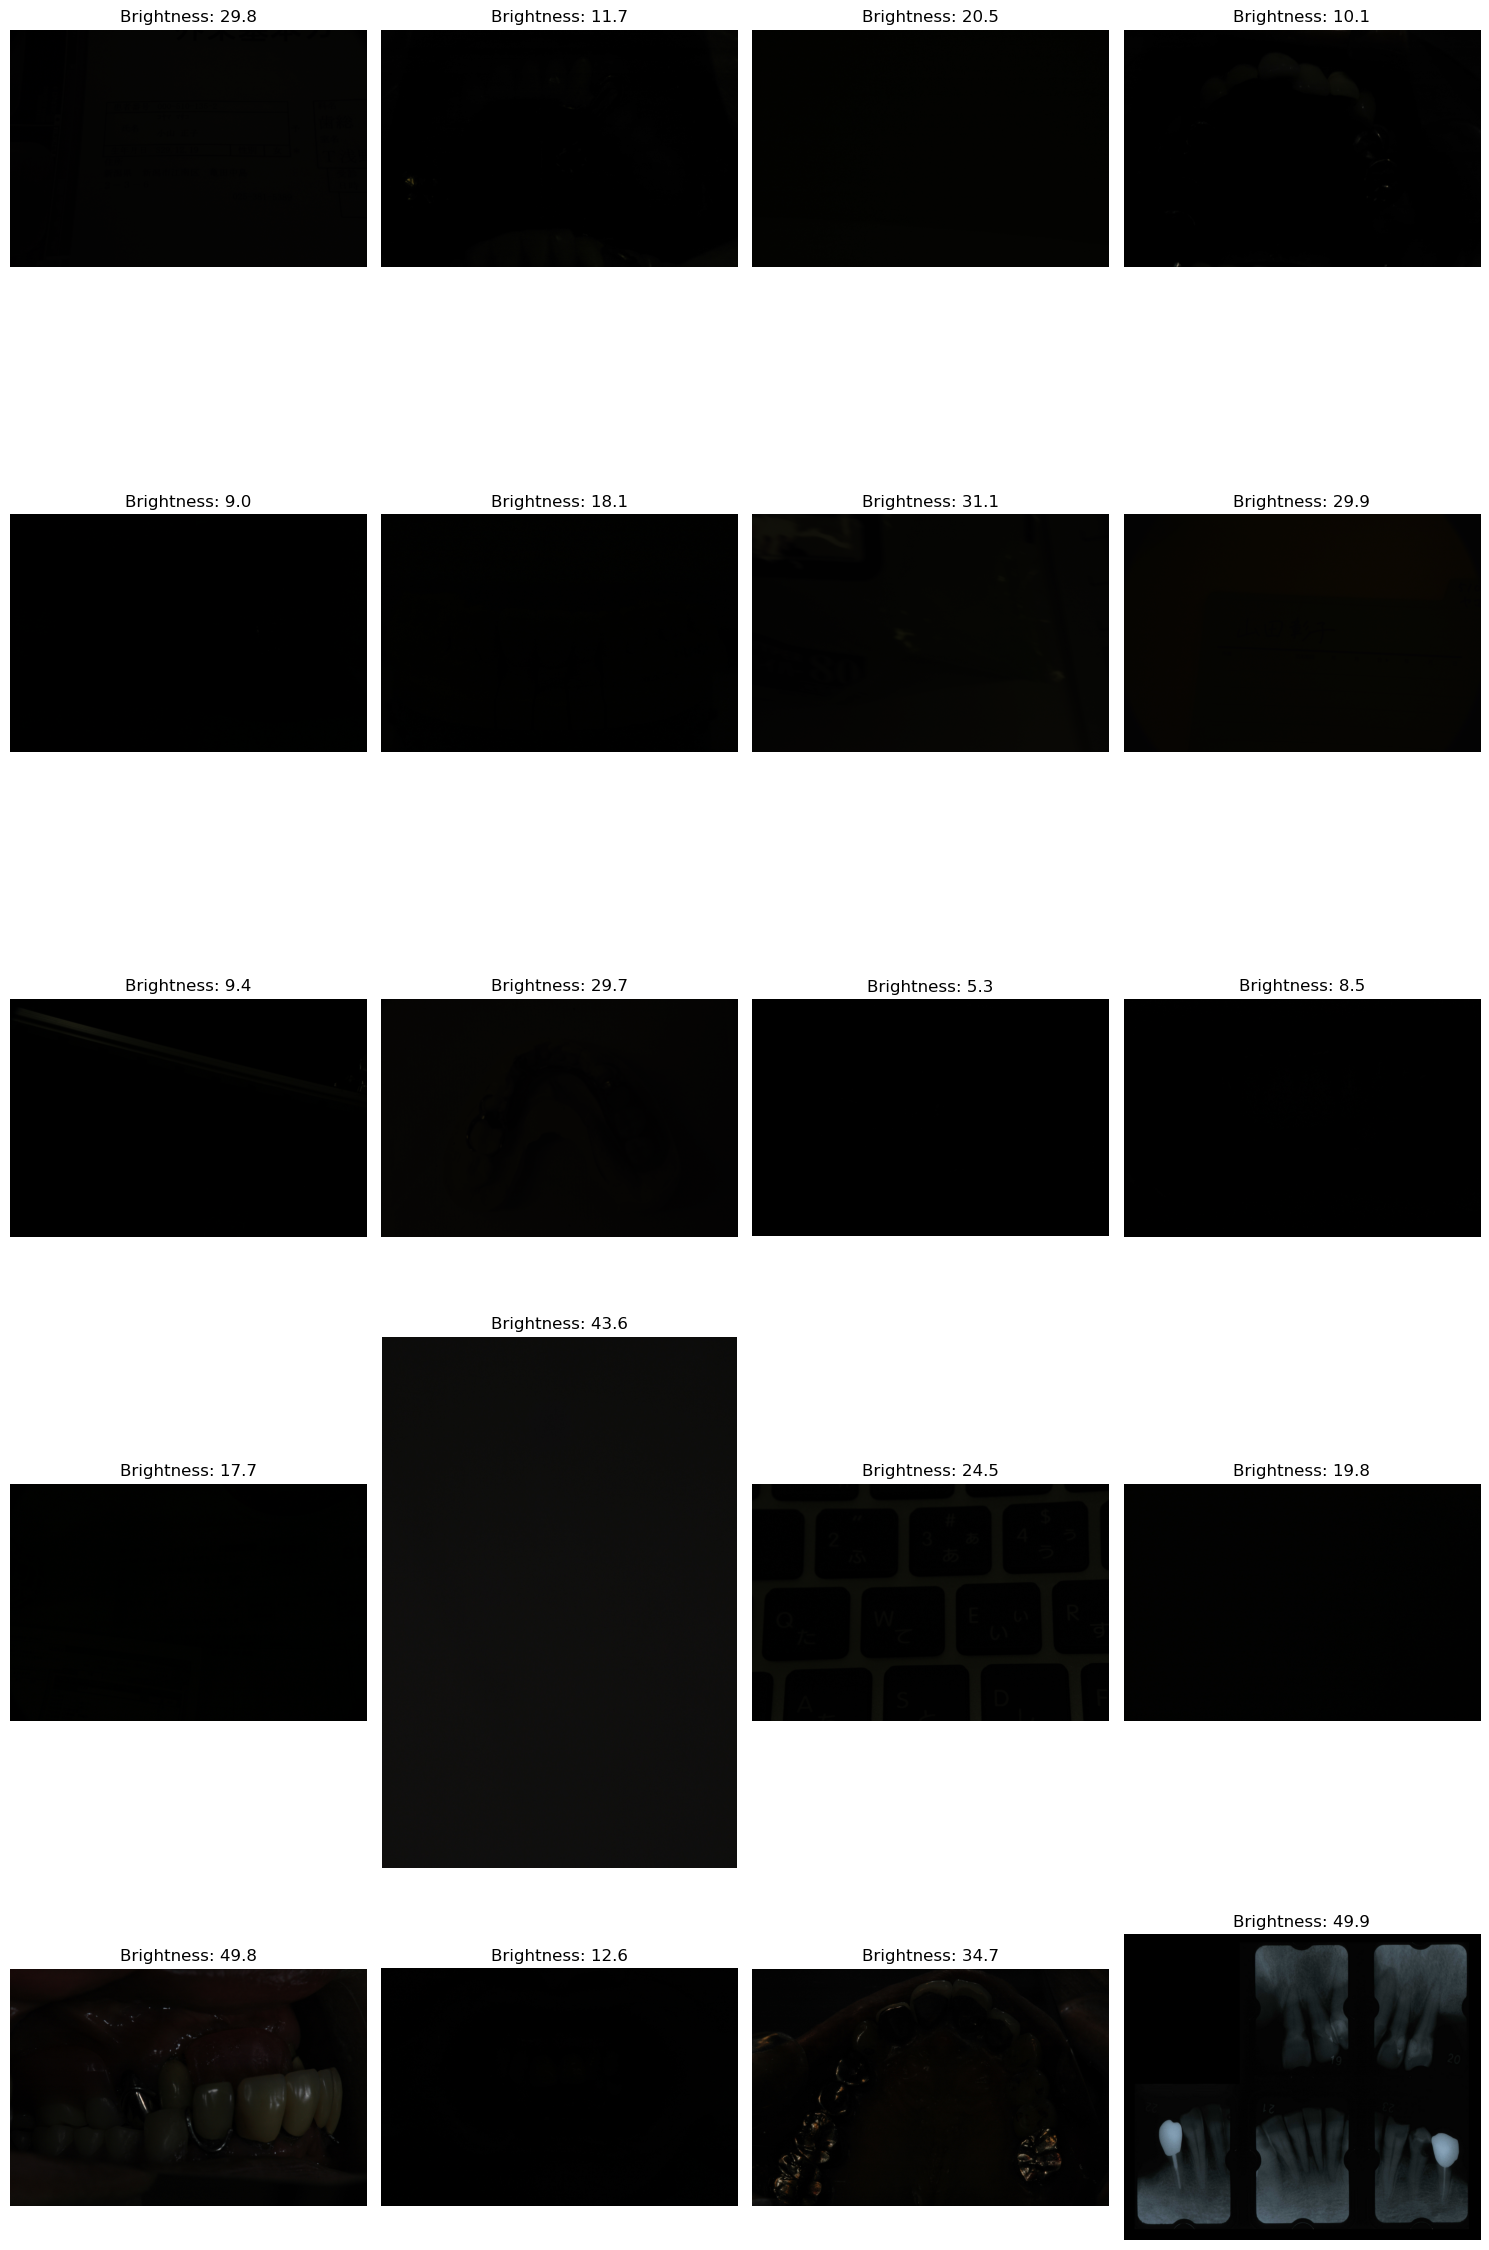

In [34]:
# 暗すぎる画像の選定
import cv2
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# 閾値を指定
threshold = 50

# 暗すぎる画像を抽出
dark_images = df[df['mean_brightness'] < threshold]
print(f'Too dark images: {len(dark_images)}')

# ランダムに20件を選択
sampled_images = dark_images.sample(n=min(20, len(dark_images)), random_state=42)

# 画像をロードして表示
num_images = len(sampled_images)
if num_images > 0:
    cols = 4  # 1行に表示する画像の数
    rows = math.ceil(num_images / cols)  # 必要な行数を計算
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # 全体のサイズを設定

    # Flatten axes for simpler iteration
    axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]

    for ax, (_, row) in zip(axes, sampled_images.iterrows()):
        image_path = row['path']
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax.imshow(image)
            ax.axis('off')
            ax.set_title(f"Brightness: {row['mean_brightness']:.1f}")
        else:
            ax.axis('off')
            ax.set_title("Load Error")
    
    # Turn off remaining empty axes
    for ax in axes[num_images:]:
        ax.axis('off')
else:
    print("該当する画像がありません。")

plt.tight_layout()
plt.show()

Too blight images: 36


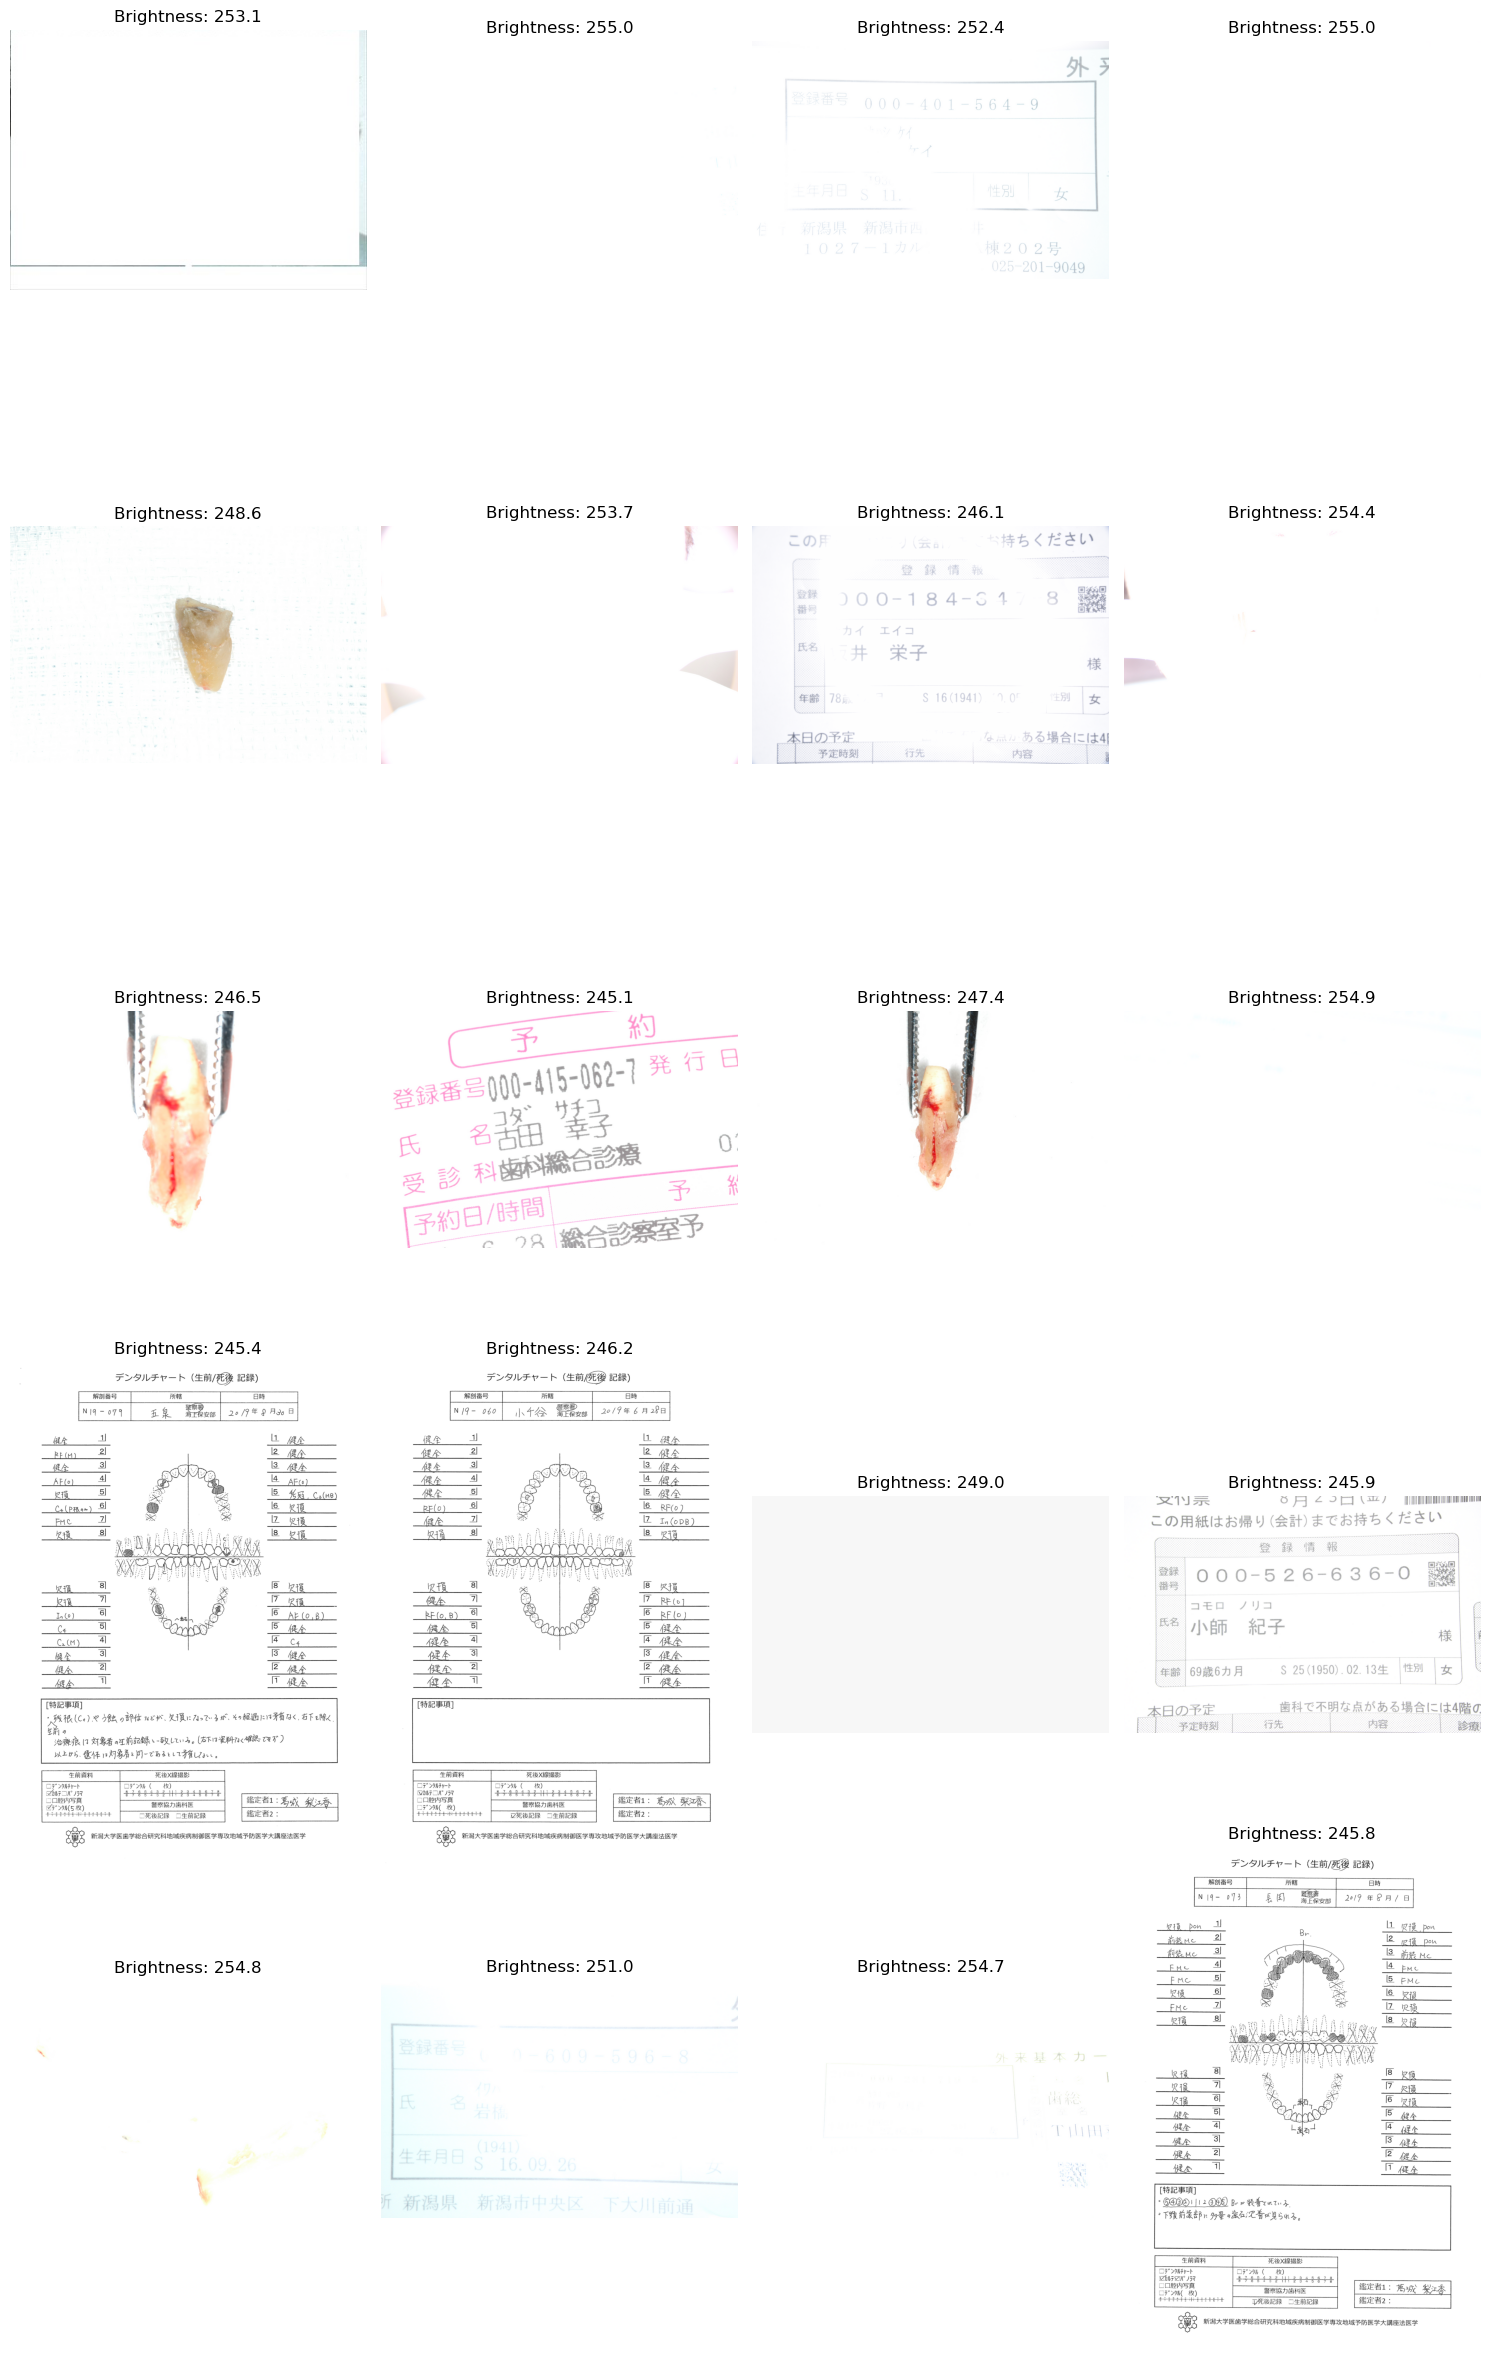

In [33]:
# 閾値を指定
threshold = 245  # 明るすぎると判断する初期値（ユーザーが調整可能）

# 明るすぎる画像を抽出
bright_images = df[df['mean_brightness'] > threshold]
print(f'Too blight images: {len(bright_images)}')

# ランダムに20件を選択
sampled_images = bright_images.sample(n=min(20, len(bright_images)), random_state=42)

# 画像をロードして表示
num_images = len(sampled_images)
if num_images > 0:
    cols = 4  # 1行に表示する画像の数
    rows = math.ceil(num_images / cols)  # 必要な行数を計算
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # 全体のサイズを設定

    # Flatten axes for simpler iteration
    axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]

    for ax, (_, row) in zip(axes, sampled_images.iterrows()):
        image_path = row['path']
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax.imshow(image)
            ax.axis('off')
            ax.set_title(f"Brightness: {row['mean_brightness']:.1f}")
        else:
            ax.axis('off')
            ax.set_title("Load Error")
    
    # Turn off remaining empty axes
    for ax in axes[num_images:]:
        ax.axis('off')
else:
    print("該当する画像がありません。")

plt.tight_layout()
plt.show()

Too low variance images: 26


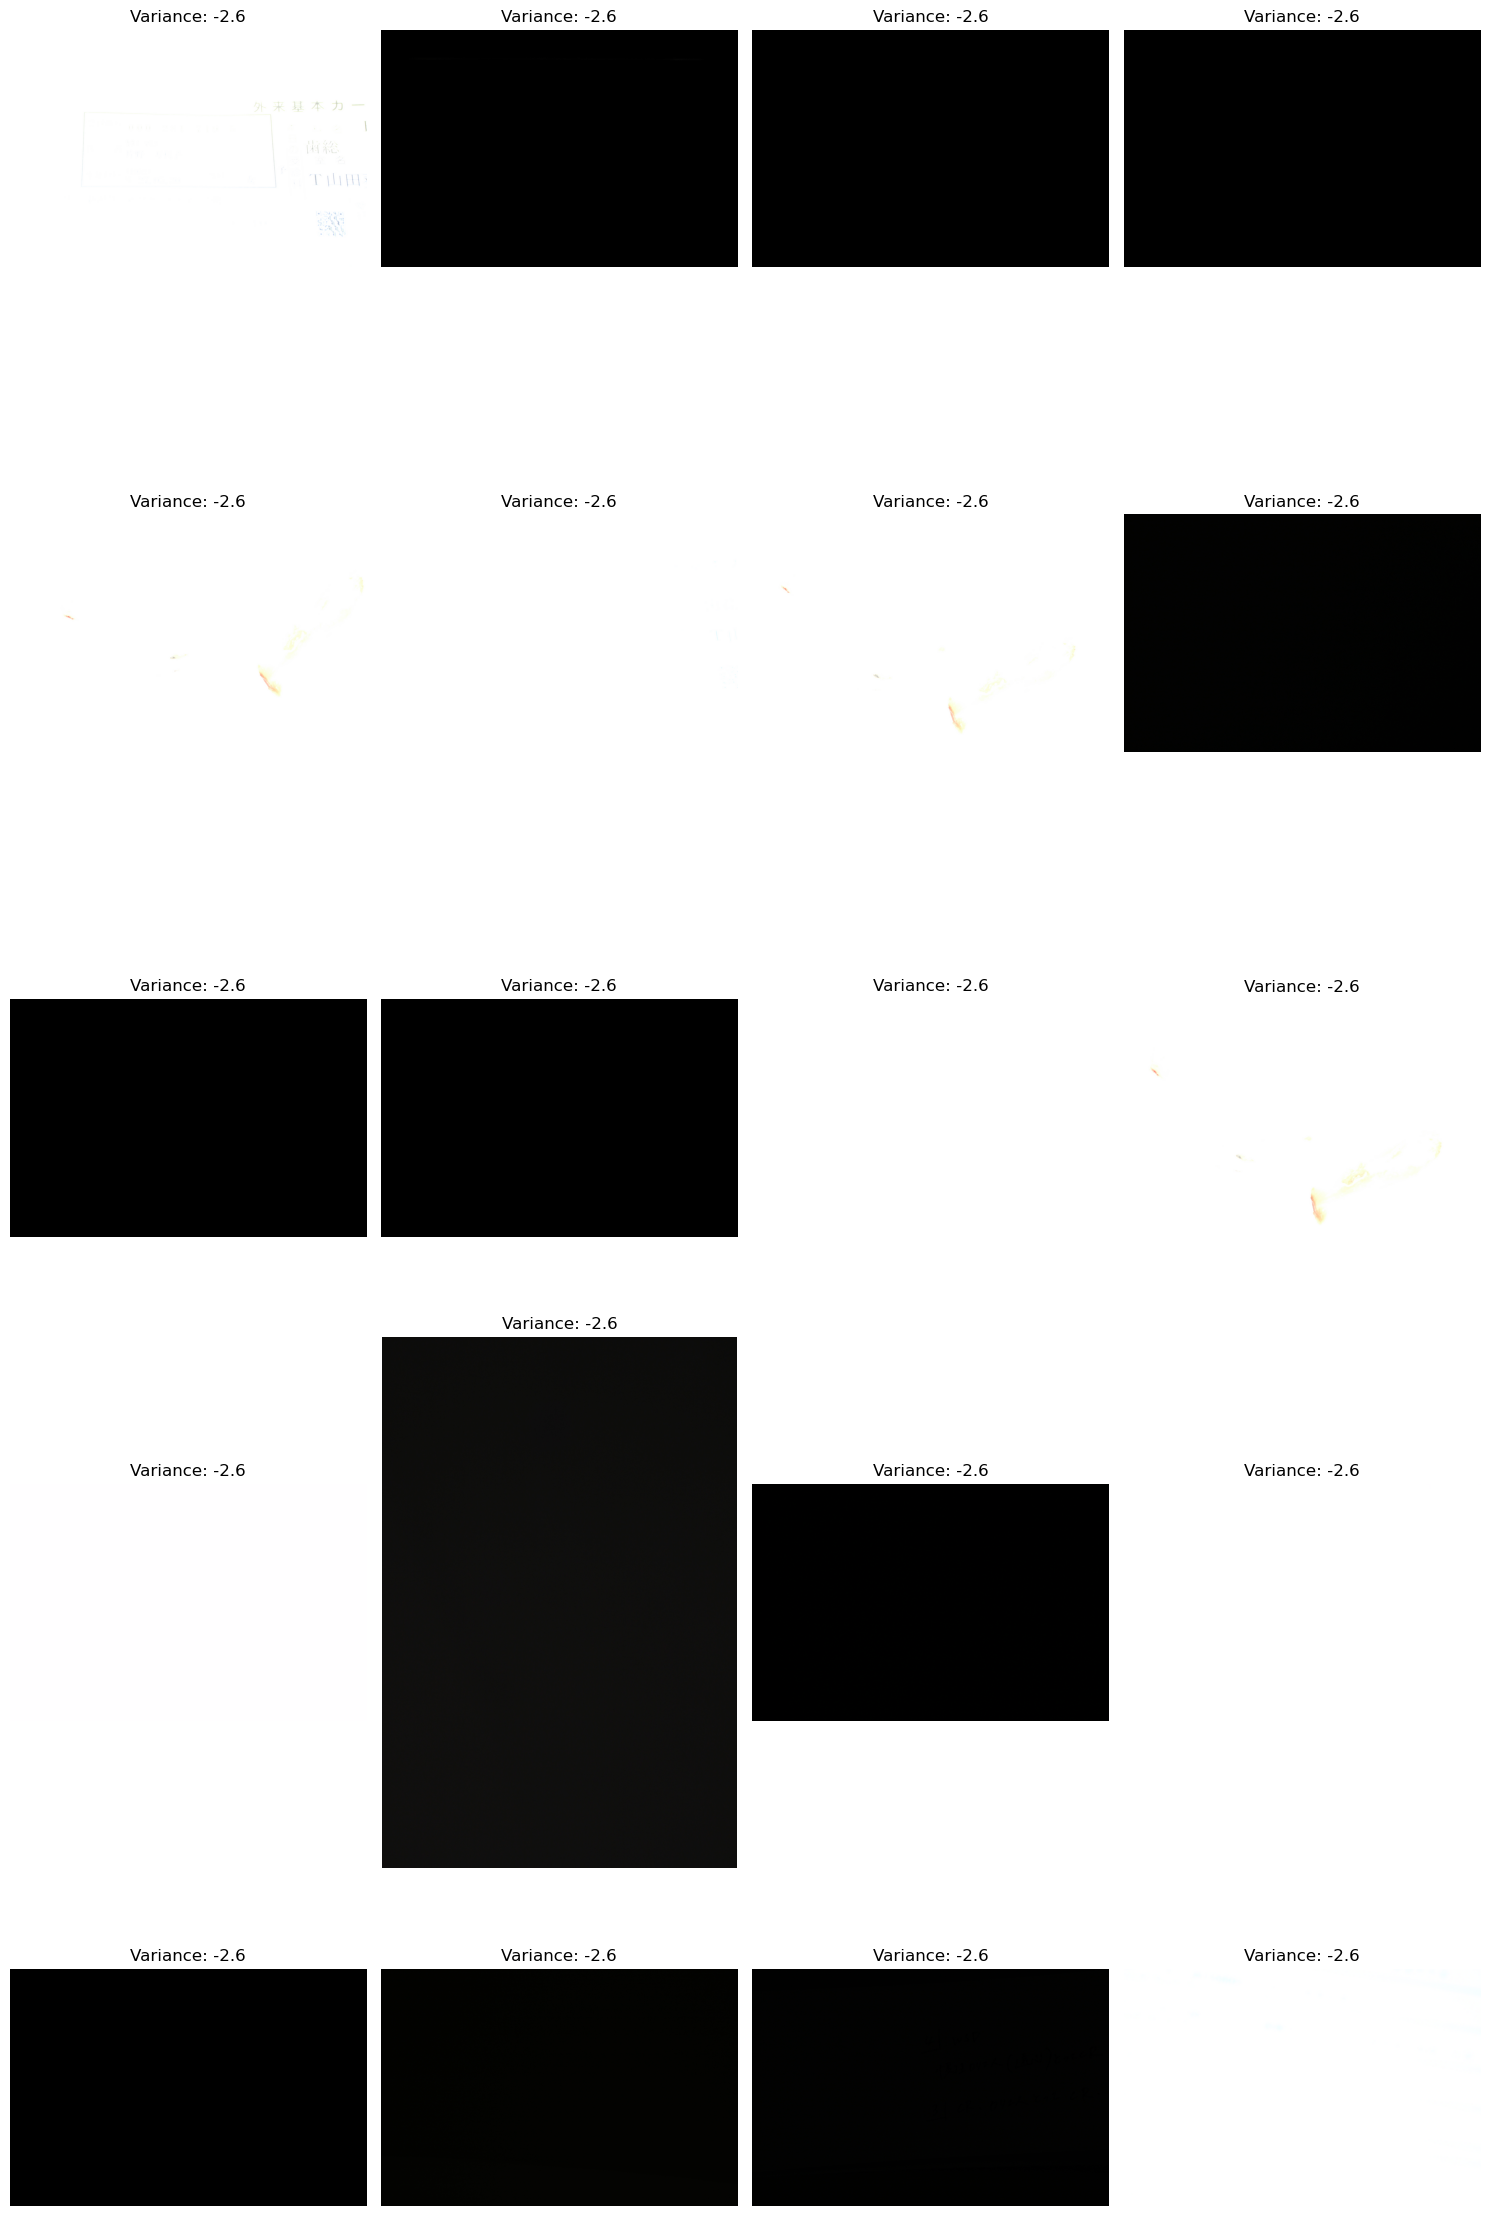

In [31]:
# 閾値を指定
threshold = -2.6

# 明るさの変化が少ない画像を抽出
uniform_images = df[df['variance_brightness_std'] < threshold]
print(f'Too low variance images: {len(uniform_images)}')

# ランダムに20件を選択
sampled_images = uniform_images.sample(n=min(20, len(uniform_images)), random_state=42)

# 画像をロードして表示
num_images = len(sampled_images)
if num_images > 0:
    cols = 4  # 1行に表示する画像の数
    rows = math.ceil(num_images / cols)  # 必要な行数を計算
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # 全体のサイズを設定

    # Flatten axes for simpler iteration
    axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]

    for ax, (_, row) in zip(axes, sampled_images.iterrows()):
        image_path = row['path']
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax.imshow(image)
            ax.axis('off')
            ax.set_title(f"Variance: {row['variance_brightness_std']:.1f}")
        else:
            ax.axis('off')
            ax.set_title("Load Error")
    
    # Turn off remaining empty axes
    for ax in axes[num_images:]:
        ax.axis('off')
else:
    print("該当する画像がありません。")

plt.tight_layout()
plt.show()

In [43]:
# データフレームをロード
file_path = '../04_Features/images.parquet'
df = pd.read_parquet(file_path)

# 条件1: mean_brightnessが50より小さい、または245より大きい
condition1 = (df['mean_brightness'] < 50) | (df['mean_brightness'] > 245)

# 条件2: variance_brightness_std が-2.6より小さい
condition2 = df['variance_brightness_std'] < -2.6

# 両方の条件を満たすかどうかを判定し、exclude_by_brightness列を作成
df['exclude_by_brightness'] = condition1 & condition2

# 確認: exclude_by_brightness列にはTrue/Falseしかないことを確認
unique_values = df['exclude_by_brightness'].unique()
assert set(unique_values) == {True, False}, f"Unexpected values in 'exclude_by_brightness': {unique_values}"

# 統計情報を表示
total_count = len(df)
exclude_count = df['exclude_by_brightness'].sum()
print(f"全{total_count}件のうち、除外対象は{exclude_count}件です。")

# 必要なら最初の数行を確認
print(df.head())

# 保存
output_parquet_path = "./exclusion.parquet"
df.to_parquet(output_parquet_path)

全14890件のうち、除外対象は26件です。
   index dirname                                               path  width  \
0      0      61  ../mydata/00_working/2022-05-02/61/59-62-65-IM...   3000   
1      1      61  ../mydata/00_working/2022-05-02/61/24-30-36-IM...   3000   
2      2      61  ../mydata/00_working/2022-05-02/61/29-35-40-IM...   3000   
3      3      61  ../mydata/00_working/2022-05-02/61/23-3-11-DSC...   3000   
4      4      61  ../mydata/00_working/2022-05-02/61/40-45-5-DSC...   3000   

   height               created_time              modified_time color_mode  \
0    2000 2024-11-22 20:05:13.475698 2024-11-22 20:05:13.475698        RGB   
1    2000 2024-11-22 20:05:13.295251 2024-11-22 20:05:13.295251        RGB   
2    2000 2024-11-22 20:05:13.871609 2024-11-22 20:05:13.871609        RGB   
3    2000 2024-11-22 20:05:13.666497 2024-11-22 20:05:13.666497        RGB   
4    2000 2024-11-22 20:05:14.076683 2024-11-22 20:05:14.076683        RGB   

     file_size                         